## Building Dummy Data

In much the same way that libraries like `sklearn` and `seaborn` come, batteries-included, with utilities to pull canonical datasets or generate novel data following some known distribution, `networkx` provides dozens of similar utilities. The [`Graph Generators` documentation](https://networkx.org/documentation/stable/reference/generators.html#graph-generators) houses far more methods than I know or care to cover. For simplicity's sake, I'll group these methods-- broady-- into three categories

### Canonical

This is used to generate known, well-documented, networks within the Network Science literature-- think Iris, but for dots and lines. These include many different networks of varying complexity

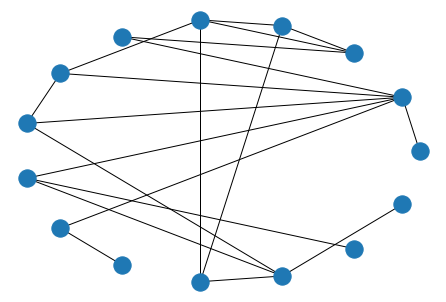

In [1]:
import networkx as nx
nx.draw_circular(nx.florentine_families_graph())

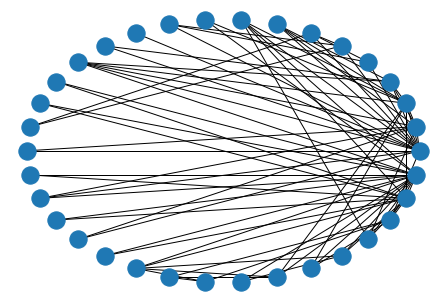

In [2]:
nx.draw_circular(nx.karate_club_graph())

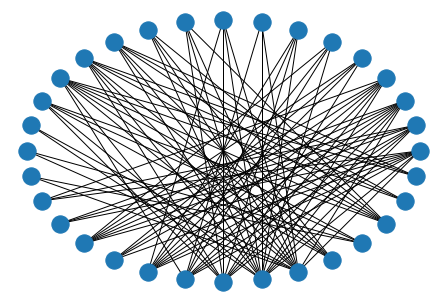

In [3]:
nx.draw_circular(nx.davis_southern_women_graph())

### Simple Synthetic

Additionally, the library has methods that generate networks by following a simple set of rules. Such as

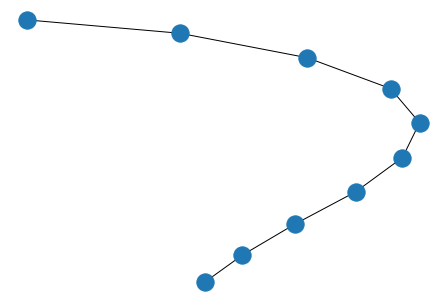

In [4]:
# linear
nx.draw(nx.path_graph(10))

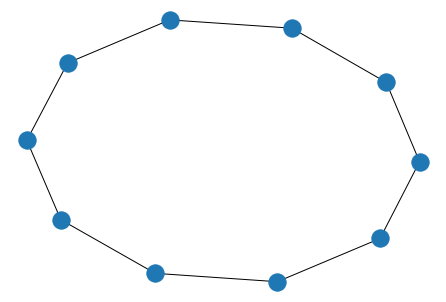

In [5]:
# circle/cycle
nx.draw(nx.cycle_graph(10))

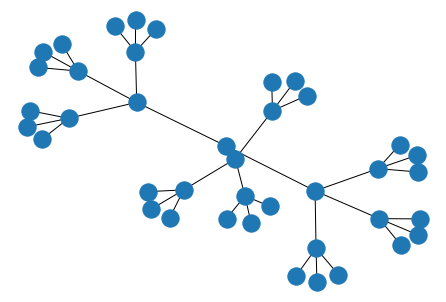

In [6]:
# balanced binary tree
nx.draw(nx.balanced_tree(
    r=3, # branching factor
    h=3  # height
))

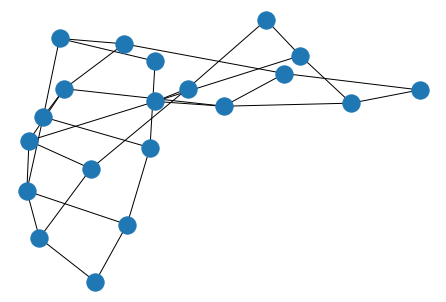

In [7]:
# grid
nx.draw(nx.grid_2d_graph(
    m=4,# rows
    n=5 # columns
))

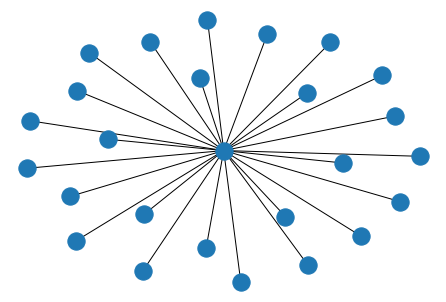

In [8]:
# star
nx.draw(nx.star_graph(25))

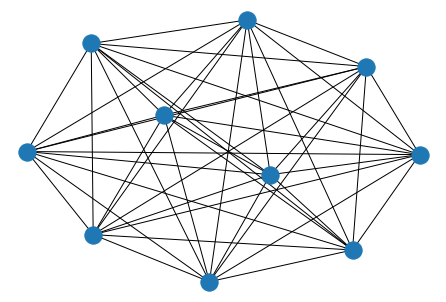

In [9]:
# everything-connected-to-everything
nx.draw(nx.complete_graph(10))

### Noisy Synthetic

Finally, the last class of generators uses a hierarchy of rules to generate their graphs. This is particularly useful in simulating data closer to what you'd see in the wild. I'll try and cover them with a bit more insight.

#### Erdos-Renyi

This graph is rooted in the binomial distribution, where there are `N(N-1)/2` possible edges, each occuring with probability `p`. Playing with `p` is a nice lever to pull when you want to ratchet sparsity up/down. However, it's difficult to predict the effect that has on various network statistics you might be calculating. [Complex Network Analysis in Python](https://smile.amazon.com/Complex-Network-Analysis-Python-Recognize/dp/1680502697?sa-no-redirect=1) suggests this as your best bet when generating fake data, unless you know another generation strategy that gets you closer to your ideal data usecase.

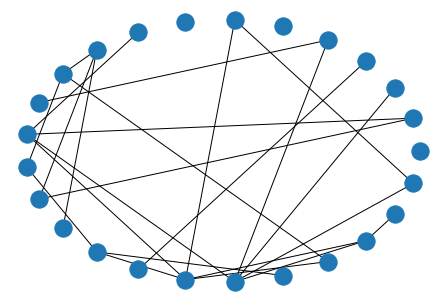

In [10]:
nx.draw_circular(nx.erdos_renyi_graph(n=25, p=.1))

#### Watts-Strogatz

The Watts-Strogatz generator, while very similar to Erdos-Renyi, tends to generate "more realistic" data than its predecessor, apparently. It does this by generating `n` points in a circle, then connecting each point to its `k` nearest neighbors. Finally, it looks over all `(from, to)` edge pairs and randomly changes the value of `to` to a yet-unconnected node, with probability `p`.

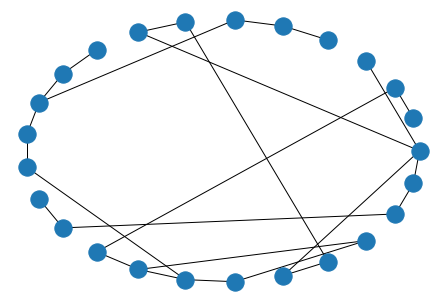

In [11]:
nx.draw_circular(nx.watts_strogatz_graph(n=25, k=3, p=.4))

### Barabasi-Albert

According to the book, the Barabasi-Albert *preferential attachment* model is useful when trying to simulate "hubs" or "celebrity" nodes with a high degree of attachment.

It does this by attaching each new node to `m` other nodes-- with a probability weighted to how connected each candidate node is. As a consequence of this, you can see that nodes inserted closer to the beginning have a higher degree than those that eked in at the end and tossed two (often) their only two connections.

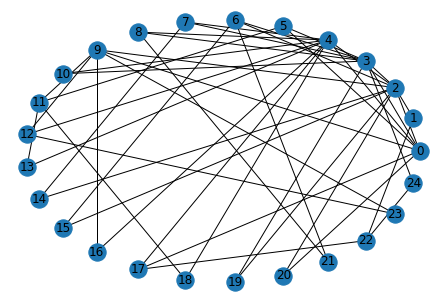

In [12]:
G = nx.barabasi_albert_graph(n=25, m=2)
nx.draw_circular(G)
nx.draw_networkx_labels(G, pos=nx.circular_layout(G));

### Holme-Kim / Power Law

Finally, the Holme-Kim/Power Law generator does everything described in the Barabasi-Albert, but also introduces a triad between any three connected components, with probability `p`.

Concretely, if we have `A - B` and `B - C`, then we'll have a connected loop of `A - B - C - A - B - C ...` with probability `p`

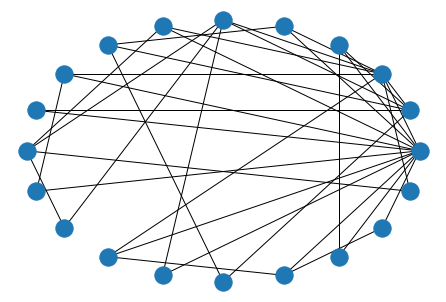

In [13]:
G = nx.powerlaw_cluster_graph(n=20, m=2, p=.3)
nx.draw_circular(G)